In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [5]:

# Load the CSV file
df1 = pd.read_csv("../acs5_data_2018.csv")
df2 = pd.read_csv("../acs5_data_2022.csv")

In [6]:
df1.head()

,STATE,COUNTY,NAME,median_bachelor_edu,median_home_value,geometry,year
0,13,1,"Appling County, Georgia",693,75900,"POLYGON ((-82.550691 31.749112, -82.547445 31....",2018
1,13,3,"Atkinson County, Georgia",268,60100,"POLYGON ((-83.140999 31.406734, -83.138977 31....",2018
2,13,5,"Bacon County, Georgia",439,73000,"POLYGON ((-82.628185 31.565929999999998, -82.6...",2018
3,13,7,"Baker County, Georgia",193,75500,POLYGON ((-84.64165899999999 31.31250099999999...,2018
4,13,9,"Baldwin County, Georgia",3399,112500,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",2018


In [7]:
df2.head()

,STATE,COUNTY,NAME,median_bachelor_edu,median_home_value,geometry,year
0,13,1,"Appling County, Georgia",676,88500,"POLYGON ((-82.550691 31.749112, -82.547445 31....",2022
1,13,3,"Atkinson County, Georgia",306,77100,"POLYGON ((-83.140999 31.406734, -83.138977 31....",2022
2,13,5,"Bacon County, Georgia",373,95600,"POLYGON ((-82.628185 31.56593, -82.627342 31.6...",2022
3,13,7,"Baker County, Georgia",227,121600,"POLYGON ((-84.641659 31.312501, -84.639944 31....",2022
4,13,9,"Baldwin County, Georgia",3770,154400,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",2022


In [8]:
import addfips
af = addfips.AddFIPS()

def get_fips(row):
    county, state = row['NAME'].split(", ")
    return af.get_county_fips(county, state=state)

In [9]:
# Apply the function to each row and store results in a new column
df1['FIPS'] = df1.apply(get_fips, axis=1)

In [10]:
df2['FIPS'] = df1.apply(get_fips, axis=1)

In [11]:
df1.head(1)

,STATE,COUNTY,NAME,median_bachelor_edu,median_home_value,geometry,year,FIPS
0,13,1,"Appling County, Georgia",693,75900,"POLYGON ((-82.550691 31.749112, -82.547445 31....",2018,13001


In [12]:
df2.head(1)

,STATE,COUNTY,NAME,median_bachelor_edu,median_home_value,geometry,year,FIPS
0,13,1,"Appling County, Georgia",676,88500,"POLYGON ((-82.550691 31.749112, -82.547445 31....",2022,13001


In [14]:
!pip install plotly-geo==1.0.0
!pip install geopandas==0.8.1
!pip install pyshp==2.1.2

^C
ERROR: Operation cancelled by user


In [20]:
import plotly.figure_factory as ff
import numpy as np

'''
values = df1['median_home_value'].tolist()
fips = df1['FIPS'].tolist()

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

#df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
#df_sample_r = df_sample[df_sample['STNAME'] == 'Florida']
'''
values = df1['median_home_value'].tolist()
fips = df1['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Georgia'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Median Home Value ',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:809: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:358: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:848: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. 

In [18]:
values = df1['median_home_value'].tolist()
fips = df1['FIPS'].tolist()

fig = ff.create_choropleth(fips=fips, values=values, scope=['Georgia'])
fig.layout.template = None
fig.show()

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:775: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:331: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:358: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.

/opt/miniconda3/envs/streamlit240616/lib/python3.12/site-packages/plotly/figure_factory/_county_choropleth.py:848: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. 

In [43]:
df1['COUNTY'].unique()

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  43,  45,  47,  49,  51,  53,
        55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,  79,
        81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103, 105,
       107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131,
       133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157,
       159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183,
       185, 187, 189, 191, 193, 195, 197, 199, 201, 205, 207, 209, 211,
       213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237,
       239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263,
       265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289,
       291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315,
       317, 319, 321])

In [44]:
df2['COUNTY'].unique()

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  43,  45,  47,  49,  51,  53,
        55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,  79,
        81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103, 105,
       107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131,
       133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157,
       159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183,
       185, 187, 189, 191, 193, 195, 197, 199, 201, 205, 207, 209, 211,
       213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237,
       239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263,
       265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287, 289,
       291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311, 313, 315,
       317, 319, 321])

In [45]:
len(df1)

159

In [46]:
len(df1['COUNTY'].unique())

159

In [47]:
len(df2)

159

In [49]:
len(df2['COUNTY'].unique())

159

In [40]:
df1['COUNTY'].unique()

array([ 57,  63,  67,  89,  97, 113, 117, 121, 135, 151, 247])

In [41]:
df2['COUNTY'].unique()

array([ 57,  63,  67,  89,  97, 113, 117, 121, 135, 151, 247])

In [74]:
df1['NAME'].unique()

array(['Appling County, Georgia', 'Atkinson County, Georgia',
       'Bacon County, Georgia', 'Baker County, Georgia',
       'Baldwin County, Georgia', 'Banks County, Georgia',
       'Barrow County, Georgia', 'Bartow County, Georgia',
       'Ben Hill County, Georgia', 'Berrien County, Georgia',
       'Bibb County, Georgia', 'Bleckley County, Georgia',
       'Brantley County, Georgia', 'Brooks County, Georgia',
       'Bryan County, Georgia', 'Bulloch County, Georgia',
       'Burke County, Georgia', 'Butts County, Georgia',
       'Calhoun County, Georgia', 'Camden County, Georgia',
       'Candler County, Georgia', 'Carroll County, Georgia',
       'Catoosa County, Georgia', 'Charlton County, Georgia',
       'Chatham County, Georgia', 'Chattahoochee County, Georgia',
       'Chattooga County, Georgia', 'Cherokee County, Georgia',
       'Clarke County, Georgia', 'Clay County, Georgia',
       'Clayton County, Georgia', 'Clinch County, Georgia',
       'Cobb County, Georgia', 'Co

In [72]:
#!pip install censusdis

In [73]:
#! pip install censusdis

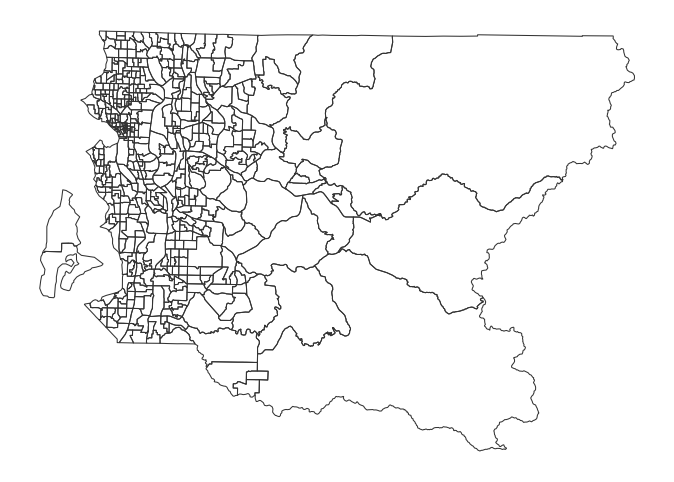

In [52]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis import states

gdf_tracts = ced.download(
    dataset='acs/acs5',
    vintage=2020,
    download_variables=['NAME'],
    
    # All the census tracts in King County
    state=states.WA,
    county="033",
    tract="*",
    
    with_geometry=True
)

ax = cem.plot_map(
    gdf_tracts.boundary,
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)

ax.axis('off')
None

In [71]:
gdf_tracts.boundary

0      LINESTRING (-122.18679 47.40861, -122.18676 47...
1      LINESTRING (-122.18678 47.39342, -122.18678 47...
2      LINESTRING (-122.20742 47.39061, -122.20742 47...
3      LINESTRING (-122.19875 47.40171, -122.19741 47...
4      LINESTRING (-122.20235 47.37974, -122.20230 47...
                             ...                        
490    LINESTRING (-122.19709 47.43023, -122.19247 47...
491    LINESTRING (-122.17591 47.42309, -122.17581 47...
492    LINESTRING (-122.19701 47.43646, -122.19699 47...
493    LINESTRING (-122.21853 47.43699, -122.21746 47...
494    LINESTRING (-122.20750 47.41588, -122.19704 47...
Length: 495, dtype: geometry

In [65]:
gdf_tracts['geometry']

0      POLYGON ((-122.18679 47.40861, -122.18676 47.4...
1      POLYGON ((-122.18678 47.39342, -122.18678 47.3...
2      POLYGON ((-122.20742 47.39061, -122.20742 47.3...
3      POLYGON ((-122.19875 47.40171, -122.19741 47.4...
4      POLYGON ((-122.20235 47.37974, -122.20230 47.3...
                             ...                        
490    POLYGON ((-122.19709 47.43023, -122.19247 47.4...
491    POLYGON ((-122.17591 47.42309, -122.17581 47.4...
492    POLYGON ((-122.19701 47.43646, -122.19699 47.4...
493    POLYGON ((-122.21853 47.43699, -122.21746 47.4...
494    POLYGON ((-122.20750 47.41588, -122.19704 47.4...
Name: geometry, Length: 495, dtype: geometry

In [66]:
df1.geometry

0      POLYGON ((-82.550691 31.749112, -82.547445 31....
1      POLYGON ((-83.140999 31.406734, -83.138977 31....
2      POLYGON ((-82.628185 31.565929999999998, -82.6...
3      POLYGON ((-84.64165899999999 31.31250099999999...
4      POLYGON ((-83.426739 33.182729, -83.42496 33.1...
                             ...                        
154    POLYGON ((-85.167551 34.723879, -85.167051 34....
155    POLYGON ((-83.612196 31.85956, -83.611075 31.9...
156    POLYGON ((-82.985513 33.78195, -82.984732 33.7...
157    POLYGON ((-83.38319 32.911687, -83.35768499999...
158    POLYGON ((-84.032692 31.716265, -84.03087 31.7...
Name: geometry, Length: 159, dtype: object

In [54]:
df1.head()

,STATE,COUNTY,NAME,median_bachelor_edu,median_home_value,geometry,year
0,13,1,"Appling County, Georgia",693,75900,"POLYGON ((-82.550691 31.749112, -82.547445 31....",2018
1,13,3,"Atkinson County, Georgia",268,60100,"POLYGON ((-83.140999 31.406734, -83.138977 31....",2018
2,13,5,"Bacon County, Georgia",439,73000,"POLYGON ((-82.628185 31.565929999999998, -82.6...",2018
3,13,7,"Baker County, Georgia",193,75500,POLYGON ((-84.64165899999999 31.31250099999999...,2018
4,13,9,"Baldwin County, Georgia",3399,112500,"POLYGON ((-83.426739 33.182729, -83.42496 33.1...",2018


In [78]:
df1[['COUNTY_NAME', 'STATE_NAME']] = df1['NAME'].str.split(", ", expand=True)

In [79]:
df1.head(1)

,STATE,COUNTY,NAME,median_bachelor_edu,median_home_value,geometry,year,COUNTY_NAME
0,Georgia,1,"Appling County, Georgia",693,75900,"POLYGON ((-82.550691 31.749112, -82.547445 31....",2018,Appling County


In [75]:
!pip3 install addfips

In [76]:
import addfips
af = addfips.AddFIPS()

af.get_county_fips('Appling County', state='Georgia')

'13001'

In [68]:
ax = cem.plot_map(
    df1.boundary,
    linewidth=0.75, 
    color='#333', 
    figsize=(12, 6),
)

ax.axis('off')

AttributeError: 'DataFrame' object has no attribute 'boundary'

In [ ]:
"""
import streamlit as st
import pandas as pd
import geopandas as gpd
from shapely import wkt


# Function to load and process data
@st.cache
def load_data():
    # Load the CSV file
    df = pd.read_csv("../acs5_data_2020.csv")
    # Convert the geometry column to a GeoSeries
    df["geometry"] = df["geometry"].apply(wkt.loads)
    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry="geometry")
    # Set the initial CRS (replace 'EPSG:XXXXX' with your actual CRS if known)
    gdf.set_crs(
        "EPSG:XXXXX", inplace=True
    )  # Replace 'XXXXX' with the appropriate EPSG code if known
    # Convert to EPSG:4326
    gdf = gdf.to_crs("EPSG:4326")
    return gdf


# Load data
centroids = load_data()

# Streamlit app layout
st.title("Map of Tract Centroids")
st.write("This map shows the centroids of the areas based on the geometry data.")

# Display the map
st.map(centroids)

# Optionally display the data
st.write(centroids)
"""

"""
import streamlit as st
import pandas as pd
import plotly.express as px

# Load the CSV file
df = pd.read_csv("../acs5_data_2020.csv")

fig = px.choropleth(
    df,
    geojson=df.geometry,
    locations=df.index,
    color=df.COUNTY,
    color_continuous_scale="Viridis",
    projection="mercator",
)
fig.update_geos(fitbounds="locations", visible=True)

st.plotly_chart(fig)